# import libraries

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read dataset

In [2]:
diabetes = load_diabetes()

X = diabetes.data      
y = diabetes.target   

print("Feature names:", diabetes.feature_names)

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(diabetes.DESCR)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X.shape: (442, 10)
y.shape: (442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of

# make data standard

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# print orig data info
print(f"Feature means:\n{scaler.mean_}\n")
print(f"\nFeature variances:\n{scaler.var_}\n")
print(f"\nFeature std dev:\n{scaler.scale_}")

# print scaled data info
print(f"\nScaled feature means:\n{np.mean(X_scaled, axis=0)}\n")
print(f"\nScaled feature variances:\n{np.var(X_scaled, axis=0)}\n")

Feature means:
[-1.44429466e-18  2.54321451e-18 -2.25592546e-16 -4.85408596e-17
 -1.42859580e-17  3.89881064e-17 -6.02836031e-18 -1.78809958e-17
  9.24348582e-17  1.35176953e-17]


Feature variances:
[0.00226244 0.00226244 0.00226244 0.00226244 0.00226244 0.00226244
 0.00226244 0.00226244 0.00226244 0.00226244]


Feature std dev:
[0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]

Scaled feature means:
[-8.03781375e-18  1.22074296e-16  6.53072367e-18 -1.14538846e-16
  5.52599696e-18 -6.53072367e-18 -1.10519939e-17  1.27349112e-16
  8.60297253e-18 -7.20577444e-17]


Scaled feature variances:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



# apply pca

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"X_train_pca.shape: {X_pca.shape}")
print(f"X_test_pca.shape: {X_pca.shape}")

for i, (var, cum_var) in enumerate(zip(
        pca.explained_variance_ratio_,
        pca.explained_variance_ratio_.cumsum()), start=1):
    print(f"PC{i}: variance={var:.4f}, cumulative={cum_var:.4f}")

X_train_pca.shape: (442, 10)
X_test_pca.shape: (442, 10)
PC1: variance=0.4024, cumulative=0.4024
PC2: variance=0.1492, cumulative=0.5517
PC3: variance=0.1206, cumulative=0.6722
PC4: variance=0.0955, cumulative=0.7678
PC5: variance=0.0662, cumulative=0.8340
PC6: variance=0.0603, cumulative=0.8943
PC7: variance=0.0537, cumulative=0.9479
PC8: variance=0.0434, cumulative=0.9913
PC9: variance=0.0078, cumulative=0.9991
PC10: variance=0.0009, cumulative=1.0000


In [5]:
loadings = pca.components_

df_loadings = pd.DataFrame(loadings, 
                           index=diabetes.feature_names, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,0.216431,0.186967,0.303162,0.271738,0.343255,0.351861,-0.282437,0.428834,0.378618,0.322183
sex,0.044367,-0.386547,-0.156281,-0.138266,0.573027,0.455942,0.506239,-0.068181,-0.026187,-0.084949
bmi,0.494668,-0.106864,0.167527,0.513571,-0.068579,-0.269689,0.386032,-0.380680,0.063630,0.276842
bp,0.414012,0.679860,-0.499825,0.019662,0.068396,0.167774,0.076020,-0.007921,-0.264427,-0.087085
s1,0.686876,-0.373464,-0.129333,-0.486874,-0.129180,-0.116722,-0.245001,0.143646,0.151639,-0.031423
s2,-0.225815,0.041705,-0.403151,-0.272783,0.005398,-0.133262,0.106354,-0.033936,0.178731,0.805066
s3,-0.109530,-0.067622,-0.519874,0.320655,0.073644,-0.230535,-0.007548,0.071244,0.647302,-0.357267
s4,-0.014937,-0.442933,-0.392922,0.477360,-0.129411,0.191325,-0.324635,0.180587,-0.449684,0.166608
s5,0.008100,-0.002106,0.042377,0.027194,-0.042038,-0.359316,0.481247,0.773817,-0.189460,-0.015274
s6,0.003263,0.003660,0.008247,-0.003222,0.709775,-0.563195,-0.317445,-0.090596,-0.264466,0.002611


In [6]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for readability
df_loadings = pd.DataFrame(loadings, 
                           index=diabetes.feature_names,  # or your feature names
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,0.434662,0.054261,0.543842,0.405149,0.559575,-0.175510,-0.080322,-0.009848,0.002269,0.000302
sex,0.375489,-0.472743,-0.117488,0.665306,-0.304249,0.032415,-0.049590,-0.292022,-0.000590,0.000339
bmi,0.608846,-0.191130,0.184181,-0.489125,-0.105363,-0.313340,-0.381243,-0.259050,0.011873,0.000764
bp,0.545735,-0.169098,0.564625,0.019242,-0.396641,-0.212015,0.235148,0.314720,0.007619,-0.000298
s1,0.689365,0.700806,-0.075396,0.066932,-0.105239,0.004196,0.054006,-0.085320,-0.011778,0.065746
s2,0.706648,0.557612,-0.296499,0.164182,-0.095090,-0.103575,-0.169059,0.126139,-0.100671,-0.052168
s3,-0.567223,0.619125,0.424407,0.074393,-0.199594,0.082661,-0.005535,-0.214029,0.134833,-0.029405
s4,0.861234,-0.083384,-0.418523,-0.007751,0.117024,-0.026376,0.052246,0.119059,0.216804,-0.008392
s5,0.760385,-0.032026,0.069956,-0.258766,0.123535,0.138915,0.474690,-0.296473,-0.053082,-0.024497
s6,0.647045,-0.103892,0.304363,-0.085220,-0.025599,0.625720,-0.261997,0.109843,-0.004279,0.000242


جدول بالا میزان اهمیت هر ویژگی روی هر کدام از بردارها را نشان میدهد. مقدار قدر مطلق بزرگتر اهمیت بیشتر در بردار و فضای جدیدتر.
به طوری که میتوان از این اعداد در انتخاب ویژگیهای با اهمیت بالاتر کمک گرفت

# plot features in new space

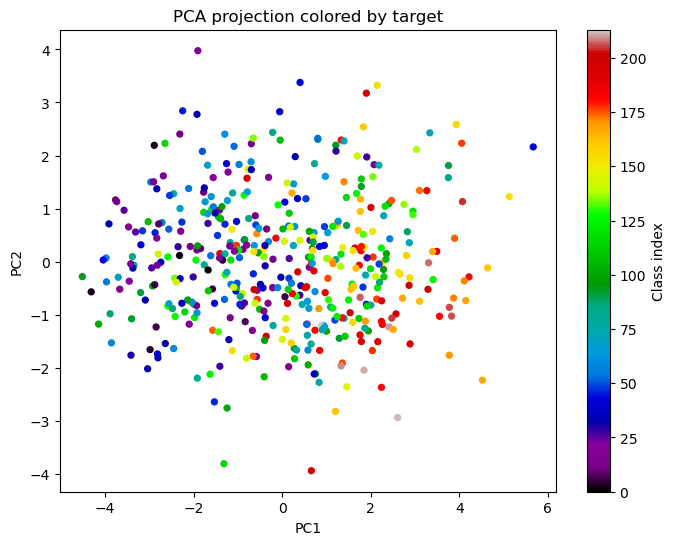

In [14]:
pc1 = 0   
pc2 = 1   

X_2d = X_pca[:, [pc1, pc2]]

unique_labels, y_idx = np.unique(y, return_inverse=True)

plt.figure(figsize=(8,6))
sc = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_idx, cmap='nipy_spectral', s=18)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection colored by target")

plt.colorbar(sc, label="Class index")
plt.show()

در فضای جدید داده‌های توی هم رفته‌اند و الگوی خاصی مشاهده نمی‌گردد. 

کاهش بعد از طرفی می‌تواند کمک کند از ابعاد بزگتر که در نفرین ابعاد به آن اشاره کردیم به بعد کوچکتر که مدلهای سنتی عملکرد بهتری دارند منتقل شویم.
از طرفی کاهش بعد منجر به کوچکتر شدن ماتریکس وزن میشود و نیاز به آموزش پارامترهای کمتری خواهیم داشت.
نویز واریانس کوچکی دارد و معمولا ساختار مشخصی هم ندارد. نویز سفید واریانس صفر را دارد برای مثال. از این رو نویز به سمت بردارهای کم اهمیت‌تر هل داده می‌شود.

معایب حذف مقادیر با واریانس کم:
- بعضی ویژگی‌ها واریانس کمی دارند اما قدرت پیش‌بینی زیادی دارند (داده‌های پزشکی در کشف بیماری یا خرابیها)
- اگر جداسازی کلاس‌ها در جهت‌های کم‌واریانس اتفاق بیفتد: PCA آن جهت‌ها را “بی‌اهمیت” فرض می‌کند